## *Buy me a coffee* - Dyno's project 1
### Topic - Let's build a neural network for image classification for fun!


---


**labels in this project**

**Airplane**: Images of airplanes in various orientations and backgrounds.

**Automobile**: Images of cars, including sedans, trucks, etc.

**Bird**: Various species of birds in different poses.

**Cat**: Images of domestic cats.

**Deer**: Different types of deer.

**Dog**: Various breeds of domestic dogs.

**Frog**: Images of frogs in different environments.

**Horse**: Images of horses, often in natural settings.

**Ship**: Various types of boats and ships.

**Truck**: Includes different types of trucks, such as pickup trucks and lorries.

In [34]:
# Install required libraries (uncomment if needed)
# !pip install tensorflow numpy matplotlib

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [35]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Explore the dataset
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)


Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing images shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [36]:
train_images, test_images = train_images / 255.0, test_images / 255.0


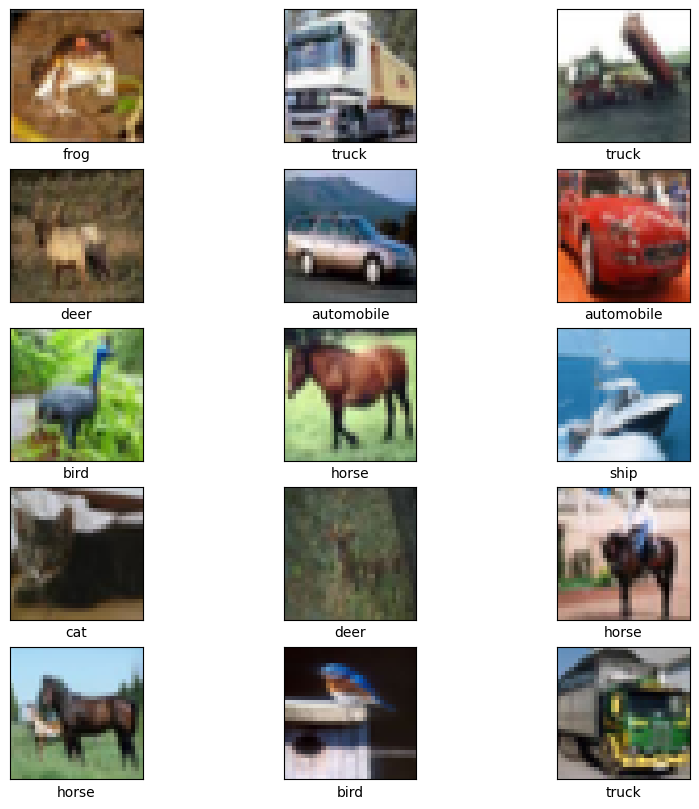

In [37]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [38]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [40]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5220 - accuracy: 0.4471 - val_loss: 1.2394 - val_accuracy: 0.5660
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1508 - accuracy: 0.5923 - val_loss: 1.0627 - val_accuracy: 0.6278
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9985 - accuracy: 0.6488 - val_loss: 0.9921 - val_accuracy: 0.6499
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8995 - accuracy: 0.6838 - val_loss: 0.9479 - val_accuracy: 0.6711
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8286 - accuracy: 0.7112 - val_loss: 0.9056 - val_accuracy: 0.6896
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7708 - accuracy: 0.7311 - val_loss: 0.8610 - val_accuracy: 0.7056
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7219 - accuracy: 0.7476 - val_loss: 0.9098 - val_accuracy

In [41]:
model.save('dyno1')

In [42]:
# Zip the model directory
!zip -r dyno1.zip dyno1/

# Download the zipped model directory
from google.colab import files
files.download('dyno1.zip')


updating: dyno1/ (stored 0%)
updating: dyno1/assets/ (stored 0%)
updating: dyno1/saved_model.pb (deflated 87%)
updating: dyno1/fingerprint.pb (stored 0%)
updating: dyno1/variables/ (stored 0%)
updating: dyno1/variables/variables.index (deflated 64%)
updating: dyno1/variables/variables.data-00000-of-00001 (deflated 19%)
updating: dyno1/keras_metadata.pb (deflated 91%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)


313/313 - 1s - loss: 0.9059 - accuracy: 0.7048 - 902ms/epoch - 3ms/step

Test accuracy: 0.704800009727478


In [44]:
probability_model = models.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(test_images)

# Check the first prediction
print("Predicted class for the first test image:", class_names[np.argmax(predictions[0])])
print("Actual class for the first test image:", class_names[test_labels[0][0]])


313/313 [==============================] - 1s 2ms/step
Predicted class for the first test image: cat
Actual class for the first test image: cat


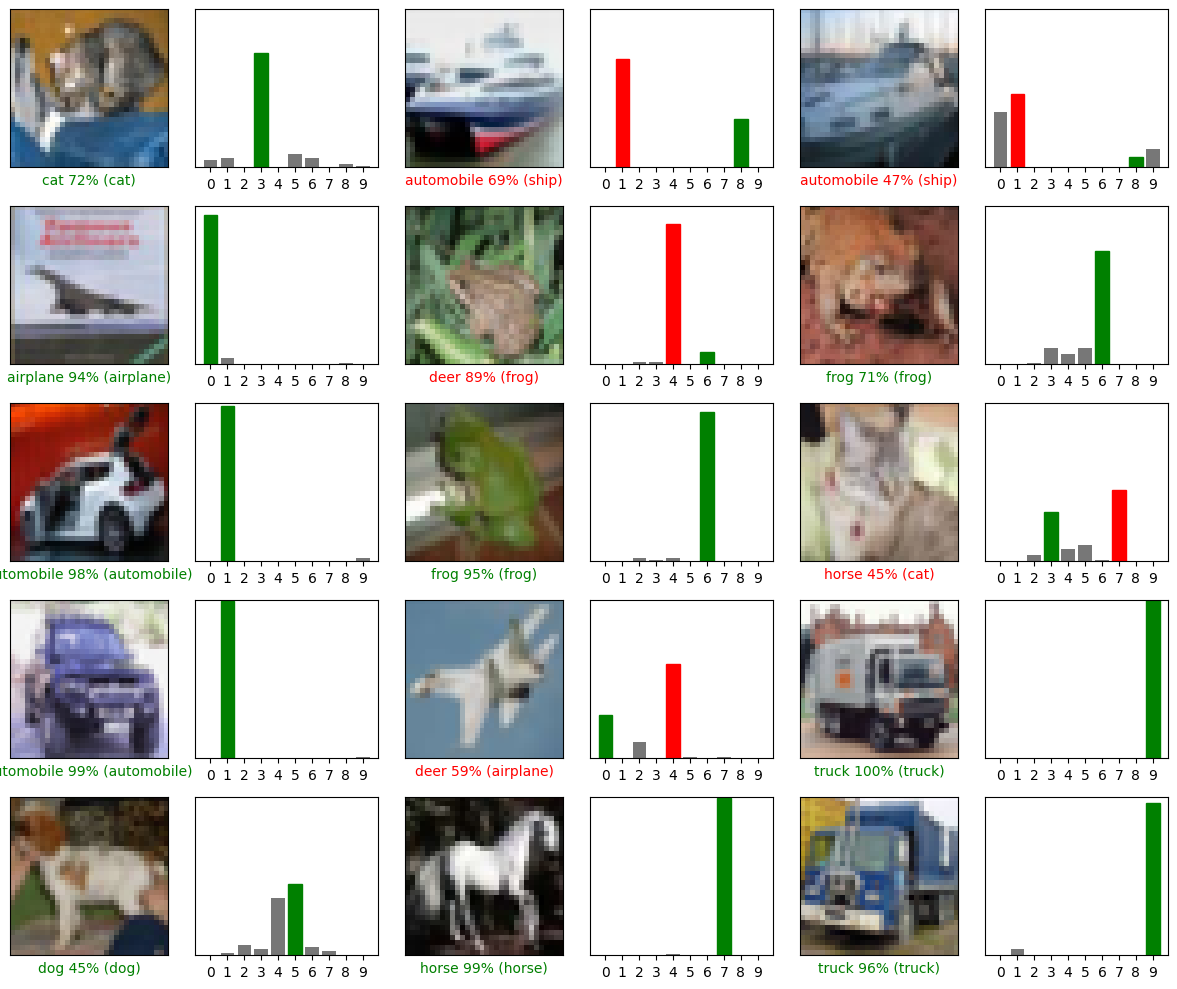

In [45]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

# Plot the first X test images, their predicted label, and the true label
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
